In [5]:
from Datos import Datos
from Arm import ArmkNN
import numpy as np

from sklearn.model_selection import train_test_split

dataset = Datos("ratings.csv")

kNNcols = ['userId','movieId','rating']
kNNdataset = dataset.extraeCols(kNNcols)


knn = ArmkNN(20)


In [6]:
# Prueba de kNN
import time

t0 = time.perf_counter()

train, test = train_test_split(kNNdataset, train_size=0.1)
knn.initSet(train)
listUsers = np.unique(train[:,0])

num = 0
den = 0

misses = 0

for u in listUsers:
    item = knn.rec_item(u)
    # Ejemplo encontrado para la recomendación
    mask1 = test[:,0] == u
    mask2 = test[:,1] == item
    mask = np.logical_and(mask1,mask2)
    test, hit = test[np.logical_not(mask)], test[mask]
    if(len(hit) != 0):
        knn.add_sample(hit[0])
        den += 1
        if(hit[0,2] >= 3):
            num += 1
    else:
        knn.add_bad_sample(u,item)
        misses += 1
print('Tasa de acierto: ',num/den)
print('Tasa de hit: ',den/(den+misses))
print('Tiempo: ', time.perf_counter() - t0)

C:\Users\David\Desktop\Universidad\TFGI\TFGReinforcementLearning\ModeloJuguete\Arm.py:141: RuntimeWarning: invalid value encountered in double_scalars
  res = usersInfo.at[user,'avg'] + numer/den


Tasa de acierto:  0.9342723004694836
Tasa de hit:  0.3555926544240401
Tiempo:  189.3595012


Pruebas de NB

In [11]:
from Datos import Datos
from Arm import ArmNB
import numpy as np

from sklearn.model_selection import train_test_split


dataset = Datos("ratings.csv")

kNNcols = ['userId','movieId','rating']
kNNdataset = dataset.extraeCols(kNNcols)

arm = ArmNB()

In [11]:
import time
import random
# Prueba de NB
train, test = train_test_split(kNNdataset, train_size=0.1)
arm.initSet(train)
listUsers = np.unique(train[:,0])
random.shuffle(listUsers)

num = 0
den = 0

misses = 0
t0 = time.perf_counter()

for u in listUsers:
    item = arm.rec_item(u)
    # Ejemplo encontrado para la recomendación
    mask1 = test[:,0] == u
    mask2 = test[:,1] == item
    mask = np.logical_and(mask1,mask2)
    test, hit = test[np.logical_not(mask)], test[mask]
    if(len(hit) != 0):
        train = np.vstack((train,hit))
        den += 1
        if(hit[0,2] >= 3):
            num += 1
    else:
        train = np.vstack((train,[u,item,1.]))
        misses += 1
print('Tasa de acierto: ',num/den)
print('Tasa de hit: ',den/(den+misses))
print('Tiempo: ', time.perf_counter() - t0)

Tasa de acierto:  0.9772727272727273
Tasa de hit:  0.07308970099667775
Tiempo:  7.432498399999986


Probando cosas más chungas

In [6]:
from Datos import Datos
from Arm import ArmItemNB
import numpy as np

from sklearn.model_selection import train_test_split

dataset = Datos("ratings.csv")

kNNcols = ['userId','movieId','rating']
kNNdataset = dataset.extraeCols(kNNcols)

datasetM = Datos("movies.csv",nominal=False)

cols = ['movieId','genres']
npdatasetM = datasetM.extraeCols(cols)

arm = ArmItemNB(npdatasetM)

In [7]:
import random,time
# Prueba de NB con items
train, test = train_test_split(kNNdataset, train_size=0.1)
arm.initSet(train)
listUsers = np.unique(train[:,0])
random.shuffle(listUsers)

t0 = time.perf_counter()

num = 0
den = 0
misses = 0

for u in listUsers:
    item = arm.rec_item(u)
    # Ejemplo encontrado para la recomendación
    mask1 = test[:,0] == u
    mask2 = test[:,1] == item
    mask = np.logical_and(mask1,mask2)
    test, hit = test[np.logical_not(mask)], test[mask]
    if(len(hit) != 0):
        den += 1
        if(hit[0,2] >= 3):
            rt = 1
            num += 1
        else:
            rt = -1
        arm.add_sample(hit[0])
    else:
        arm.add_sample([u,item,-1])
        misses += 1
print('Tasa de acierto: ',num/den)
print('Tasa de misses: ',misses/(den+misses))
print('Tiempo: ', time.perf_counter() - t0)

Tasa de acierto:  0.8888888888888888
Tasa de hit:  0.09
Tiempo:  6.2514720999997735


Probando el modelo final

Tasa de aciertos:  0.9649122807017544
228
Tasa de misses:  0.6363636363636364 

Tasa de aciertos:  0.9375
16
Tasa de misses:  0.946843853820598 

Tasa de aciertos:  0.8
5
Tasa de misses:  0.9305555555555556 



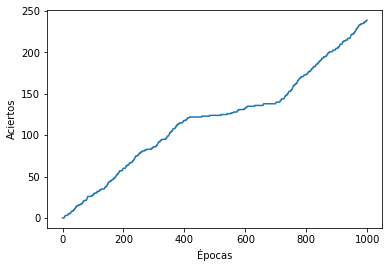

In [3]:
from Bandit import epsilonGreedy

bandit = epsilonGreedy("ratings.csv","movies.csv",epsilon=0.1)

bandit.add_knnArm(20)
bandit.add_NB()
bandit.add_itemNB()

bandit.run_epoch(epochs = 1000)

for arm in bandit.arms:
    print('Tasa de aciertos: ',arm.accuracy())
    print(arm.fails + arm.hits)
    print('Tasa de misses: ', arm.misses/(arm.hits+arm.fails+arm.misses), '\n')

Tasa de aciertos:  0.9626168224299065
107
Tasa de misses:  0.6687306501547987 

Tasa de aciertos:  0.8775510204081632
49
Tasa de misses:  0.8439490445859873 

Tasa de aciertos:  0.7857142857142857
14
Tasa de misses:  0.9614325068870524 



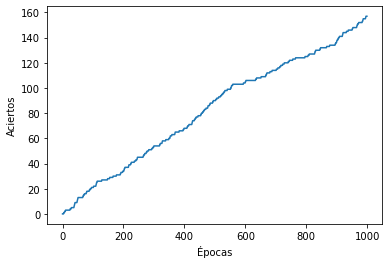

In [12]:
from Bandit import randomBandit

bandit = randomBandit("ratings.csv","movies.csv")

bandit.add_knnArm(20)
bandit.add_NB()
bandit.add_itemNB()

bandit.run_epoch(epochs = 1000)

for arm in bandit.arms:
    print('Tasa de aciertos: ',arm.accuracy())
    print(arm.fails + arm.hits)
    print('Tasa de misses: ', arm.misses/(arm.hits+arm.fails+arm.misses), '\n')

Tasa de aciertos:  0.9458128078817734
203
Tasa de misses:  0.6342342342342342 

Tasa de aciertos:  0.6666666666666666
9
Tasa de misses:  0.7567567567567568 

Tasa de aciertos:  0.9565217391304348
23
Tasa de misses:  0.9436274509803921 



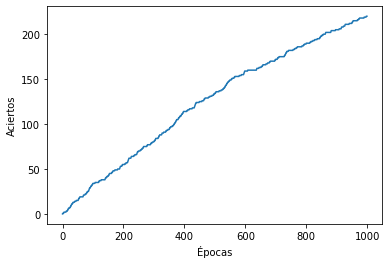

In [13]:
from Bandit import thompsonSampling

bandit = thompsonSampling("ratings.csv","movies.csv")

bandit.add_knnArm(20)
bandit.add_NB()
bandit.add_itemNB()

bandit.run_epoch(epochs = 1000)

for arm in bandit.arms:
    print('Tasa de aciertos: ',arm.accuracy())
    print(arm.fails + arm.hits)
    print('Tasa de misses: ', arm.misses/(arm.hits+arm.fails+arm.misses), '\n')